Sin duda k-means es uno de los algoritmos de aprendizaje automático no supervisado más popular. El objetivo de k-means es simple: agrupa puntos de datos similares con el objetivo de descubrir patrones subyacentes. Para lograr este objetivo, k-means busca un número fijo (k) de agrupamientos (clústers) en el conjunto de datos .

En k-means se define de inicio un número k, que se refiere al número de centroides en los que se dividirá el conjunto de datos. Cada centroide sería la ubicación que marca el centro de cada agrupación.
A cada punto se asigna uno de los grupos mediante la reducción de la suma de cuadrados en el grupo. Dicho de otra forma, el algoritmo k-means identifica k número de centroides, y luego asigna cada punto de los datos al grupo más cercano, mientras mantiene los centroides lo más pequeños posible.

Una vez tenemos cada punto asociado a un clúster, podemos etiquetarlo en el dataframe original asociándolo a dicho grupo y “catalogando” por tanto nuestros datos.

Vamos a aplicar el algoritmo sobre un conjunto de datos de las acciones de Samsung en bolsa para determinar cómo se agrupan usando k-means. Para ello nos descargamos de la web de Yahoo Finanzas el histórico con los valores desde el 1 de enero de 2008 de las acciones de Samsung Electronics Co., Ltd.

https://es.finance.yahoo.com/quote/005930.KS?p=005930.KS&.tsrc=fin-srch&guccounter=1

De los datos descargados, buscaremos patrones de agrupamiento entre dos señales elegidas, en este caso seleccionamos la señal CLOSE (precio de cierre diario) y la señal VOLUME (volumen de contrataciones diario).

Carga de librerias

In [ ]:
import pandas as pd
from sklearn import preprocessing 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Cargamos el Dataset

In [ ]:
df = pd.read_excel("Samsung.xlsx")

Visualizamos

In [ ]:
df.head()

,Index,Date,Adj Close,Volume
0,0,2021-01-11,89771328125,90306177
1,1,2021-01-12,89376718750,48682416
2,2,2021-01-13,88488875000,36068848
3,3,2021-01-14,88488875000,26393970
4,4,2021-01-15,86811828125,33431809


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Index      247 non-null    int64         
 1   Date       247 non-null    datetime64[ns]
 2   Adj Close  247 non-null    int64         
 3   Volume     247 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 7.8 KB


Eliminamos valores no existentes

In [ ]:
 df = df.dropna()
 df = df.reset_index(drop=True)

Eliminamos la columna de fechas

El siguiente paso es extraer la columna DATE (fecha) que no usaremos en el algoritmo k-means. Antes de extraerla la guardaremos en la variable dates, ya que volveremos a insertarla en nuestro dataframe tras aplicar el algoritmo:

In [ ]:
dates = df['Date'] # Guardamos la columna Date.
df = df.drop('Date', 1) # Borramos la columna del dataframe.
df = df.drop("Index", 1)

Normalizamos los datos

Como ocurre con cualquier algoritmo de Machine Learning que utilice funciones de distancia, los datos deben ser normalizados antes de aplicarles el algoritmo. En este caso utilizaremos la función MinMaxScaler() que normaliza todos los datos entre [0, 1].

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0: 'Close', 1: 'Volume'})

In [ ]:
df_escalado.head()

,Close,Volume
0,1.000000,1.000000
1,0.981183,0.492240
2,0.938847,0.338369
3,0.938847,0.220347
4,0.858879,0.306200


Representacion gráfica de los datos

Ahora podemos echar un vistazo a la representación gráfica de nuestros datos. En el eje x representaremos el precio de cierre (CLOSE) y en el eje y el volumen (VOLUME):

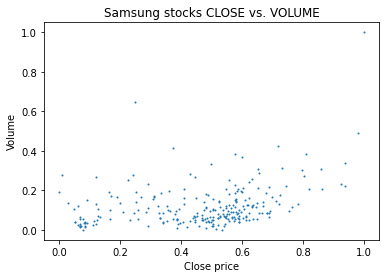

In [ ]:
x = df_escalado['Close'].values
y = df_escalado['Volume'].values
plt.xlabel('Close price')
plt.ylabel('Volume')
plt.title('Samsung stocks CLOSE vs. VOLUME')
plt.plot(x,y,'o',markersize=1)

A priori, la nube de puntos parece indicar que, a mayor volumen menor es el precio de cierre estabilizándose conforme el precio del CLOSE aumenta.

Hay que indicar que hemos representado gráficamente los datos normalizados, pero que, si hubiésemos representado los datos sin normalizar la gráfica sería exactamente igual, con la única diferencia que la escala de los ejes sería diferente.

Aplicamos K-Means

El primer paso antes de aplicar k-means es decidir qué valor de k (número de clústeres) queremos usar. Una forma de elegir este valor k es por criterio propio: si conocemos bien la distribución de nuestros datos y queremos “forzar” un número determinado de clústeres simplemente lo elegimos.

La otra opción es realizar una gráfica elbow o de codo para determinar el número óptimo de clústeres. Hacemos una iteración de k-means variando el valor de k, de forma que representamos en el eje x dicho valor de k y en el eje y la suma de los errores cuadráticos (SSE). De esta forma podemos elegir el valor de k dónde se produce el “codo” de la curva

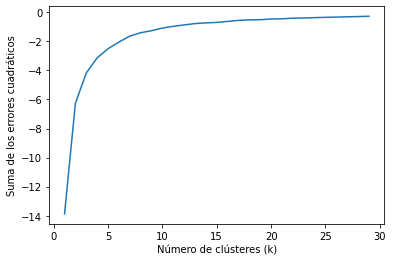

In [ ]:
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

La curva elbow nos muestra que un valor de k = 5 puede ser apropiado, aunque se podría probar con valores entre 5 y 10 y comparar resultados. No hay una solución, un valor de k, más correcto que otro, ya que el objetivo de una clusterización con k-means es obtener información útil nuestros datos, por lo que nuestra interpretación a posteriori de los clústeres creados marcará la calidad de nuestra solución escogida.

Así que ya podemos aplicar el algoritmo de k-means

Aplicamos K-Means con k=5

In [ ]:
kmeans = KMeans(n_clusters=5).fit(df_escalado)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.52572269 0.07181853]
 [0.09758963 0.08119563]
 [0.86068788 0.36191793]
 [0.63920383 0.16560554]
 [0.33826078 0.13333787]]


Etiquetamos los datos

Ya hemos ejecutado k-means y obtenido los centroides. Ahora podemos asignar cada registro de nuestro dataset a uno de los clúster

In [ ]:
labels = kmeans.predict(df_escalado)
df['label'] = labels

Hemos añadido la columna “label” a nuestro dataframe original sin normalizar, por lo que ahora, cada registro está asignado a un único clúster. Le añadimos también la columna “Date” que extrajimos al inicio para saber a qué fecha corresponde cada registro

Añadimos la columna de fechas

In [ ]:
df.insert(0, 'Date', dates)

In [ ]:
df.head()

,Date,Adj Close,Volume,label
0,2021-01-11,89771328125,90306177,2
1,2021-01-12,89376718750,48682416,2
2,2021-01-13,88488875000,36068848,2
3,2021-01-14,88488875000,26393970,2
4,2021-01-15,86811828125,33431809,2


Representacion gráfica

Una vez con los datos etiquetados, podemos visualizar gráficamente en dos dimensiones el clustering realizado por k-means, ya que hemos usado sólo dos variables


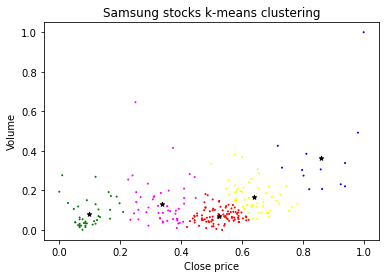

In [ ]:
colores=['red','green','blue','yellow','fuchsia']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('Close price')
plt.ylabel('Volume')
plt.title('Samsung stocks k-means clustering')
plt.show()

Clasificacion de nuevas muestras

Por último, queda por determinar la forma de clasificar nuevas muestras. Es decir, que dados nuevos datos de entrada, determinar a qué clúster pertenecen.

Supongamos que nuestros nuevos datos a categorizar son los siguientes:

CLOSE: 46.850
VOLUME: 7.196.370

In [ ]:
close = 46850
volume = 7196370

nuevo_dato = pd.DataFrame([[close,volume]]) # Nueva muestra
nuevo_dato = nuevo_dato.rename(columns = {0: 'Close', 1: 'Volume'})

No podemos introducir como tal estos valores en el algoritmo k-means ya que no están normalizados. Así que en primer lugar hay que normalizar, y para ello debemos agregarlos al conjunto de datos original.

In [ ]:
df_n = df.append(nuevo_dato)

Nuestro nuevo dataframe df_n tiene aun las columnas “date” y “label” del datafame original, así que las eliminamos y resetamos el índice:

In [ ]:
df_n = df_n.drop('Date', 1)
df_n = df_n.drop('label', 1)
df_n = df_n.reset_index(drop=True)

Ahora procedemos a normalizar el Dataframe completo como hizo anteriormente:

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df_n)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0: 'Close', 1: 'Volume'})

a tenemos nuestros nuevos datos (última final del dataframe) normalizados:

Por tanto, los valores normalizados son:

CLOSE: 0,789142
VOLUME: 0,110929

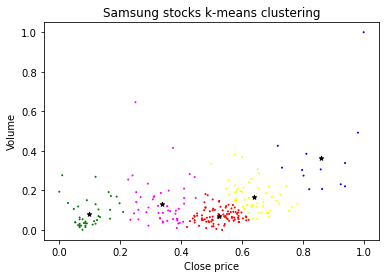

In [ ]:
colores=['red','green','blue','yellow','fuchsia']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('Close price')
plt.ylabel('Volume')
plt.title('Samsung stocks k-means clustering')
plt.show()

Esto solo es el principio, os atreveis a hacerlo con Bit coins? https://es.finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD

Aqui las posibilidades son infinitas y tal vez encontreis la forma de predecir 